### Quantitative Metrics for Model Evaluation

**Objective:**

  - Calculate key evaluation metrics to assess model prediction performance on the test set.
  - Understand RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error) as primary metrics for RUL prediction.
  - Implement metric calculations using the test dataset and previously trained model predictions.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
## Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
import matplotlib.pyplot as plt

# Suppress warnings for clearer output
import warnings
warnings.filterwarnings('ignore')

#### 2. Explanation: Evaluation Metrics for Regression (RUL Prediction)


2.1 Root Mean Squared Error (RMSE):
- RMSE measures the square root of the average squared differences between predicted and actual values.
- It penalizes larger errors more heavily, making it sensitive to outliers.
- Lower RMSE indicates better model performance.

Formula: RMSE = sqrt( (1/N) * Σ(y_true_i - y_pred_i)^2 )

2.2 Mean Absolute Error (MAE):
- MAE measures the average absolute differences between predicted and actual values.
- It provides a straightforward interpretation of average error magnitude.
- Less sensitive to large errors compared to RMSE.

Formula: MAE = (1/N) * Σ|y_true_i - y_pred_i|


In [3]:
## Load the dataset

# Assume test data (X_test, y_test) and trained model saved as 'best_lstm_model.keras'
# Load test features and labels
X_test = np.load('/content/drive/MyDrive/data/datasave/rolling_window_sequences.npy')
metadata_test = pd.read_csv('/content/drive/MyDrive/data/datasave/sequence_metadata_with_RUL.csv')
y_test = metadata_test['RUL']

In [4]:
# Load the trained LSTM model
model = tf.keras.models.load_model('/content/drive/MyDrive/data/datasave/best_lstm_model.keras')

####4. Generate Prediction on test data

In [5]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten() # Flatten to 1-D array for metric calculations.

551/551 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


####5. Calculate RMSE and MAE

In [6]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Root Mean Squared Error (RMSE): 5.8634
Mean Absolute Error (MAE): 4.0763


####6. Visualize Predicted vs Actual RUL

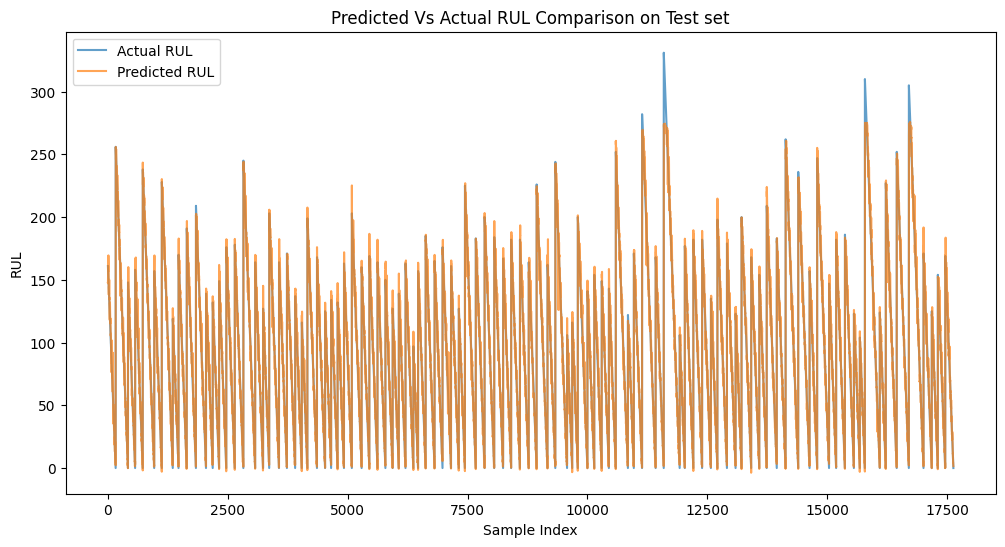

In [7]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual RUL', alpha=0.7)
plt.plot(y_pred, label='Predicted RUL', alpha=0.7)
plt.title('Predicted Vs Actual RUL Comparison on Test set')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.legend()
plt.show()